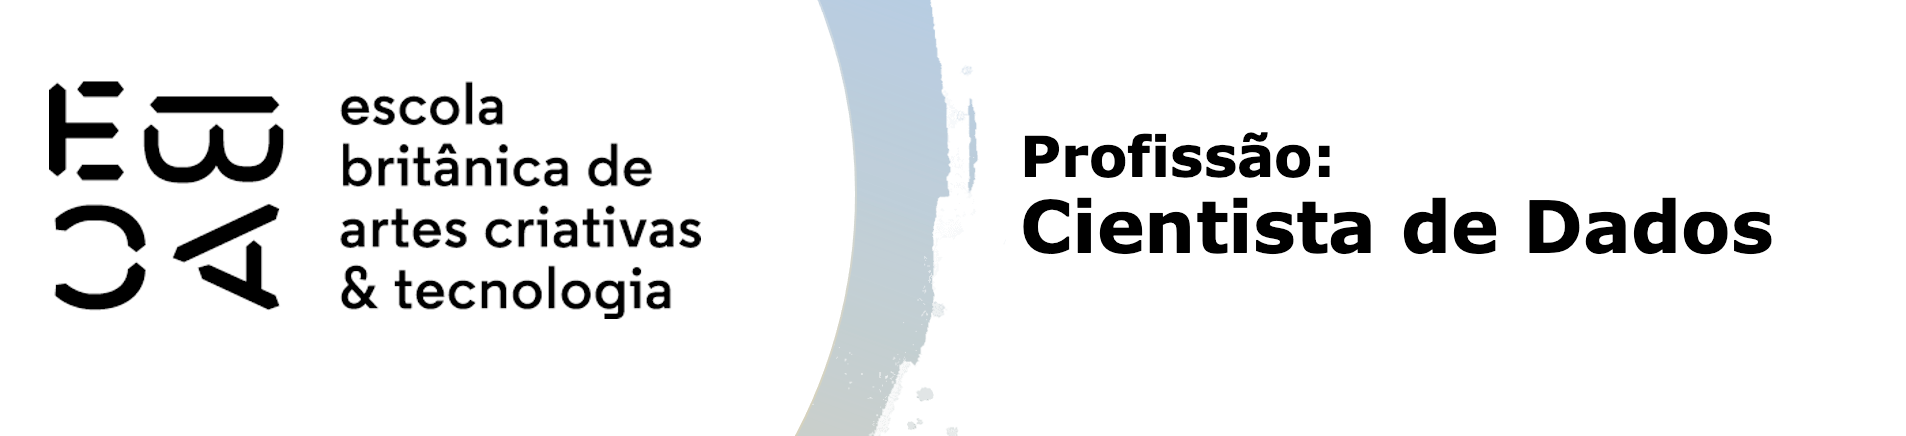

# Tarefa - Agrupamento hierárquico

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo agora é agrupar as sessões de acesso ao portal considerando o comportamento de acesso e informações da data, como a proximidade a uma data especial, fim de semana e o mês.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram

In [51]:
df = pd.read_csv('online_shoppers_intention.csv')

In [52]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [54]:
analise_descritiva = df.describe()
analise_descritiva

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


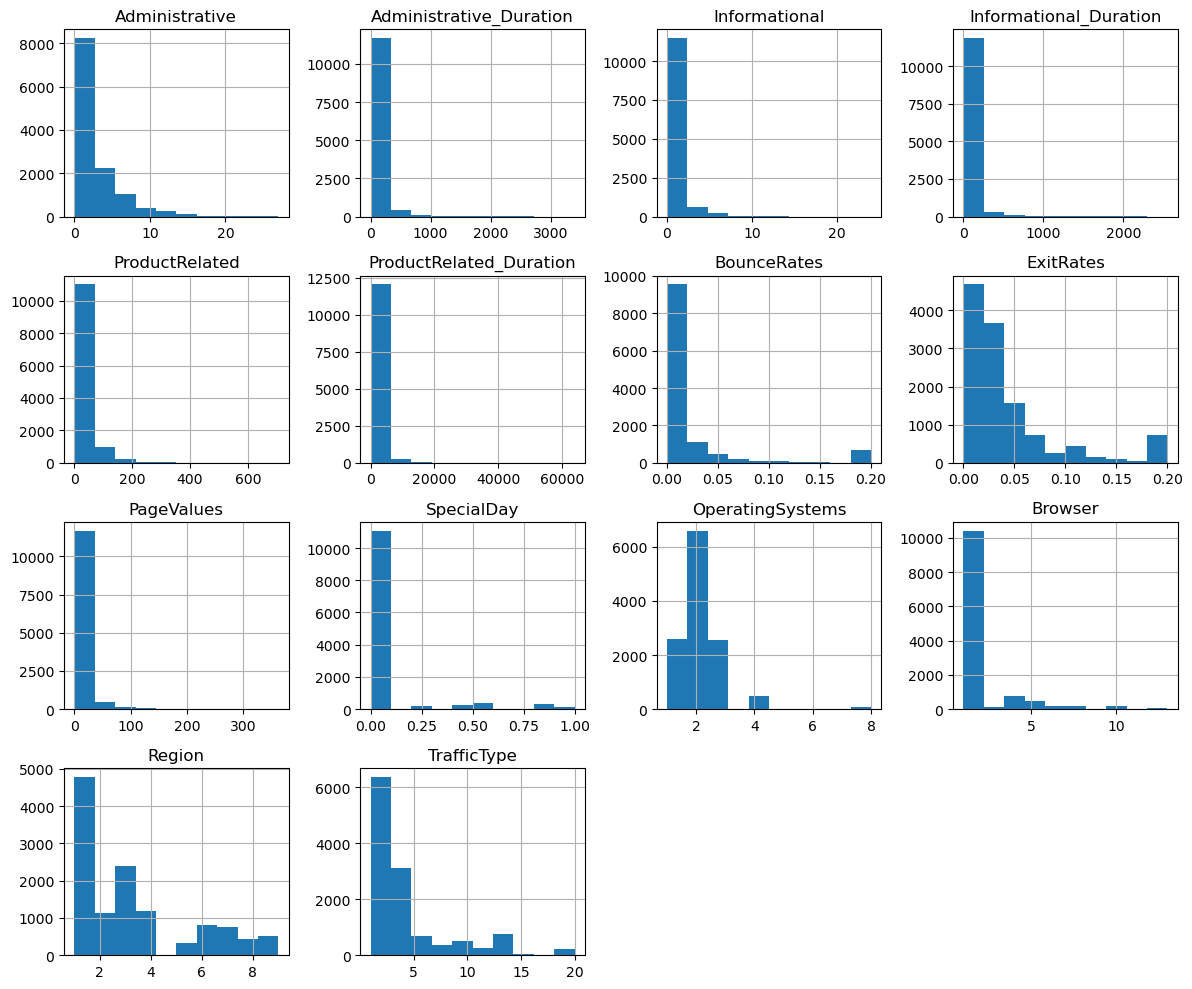

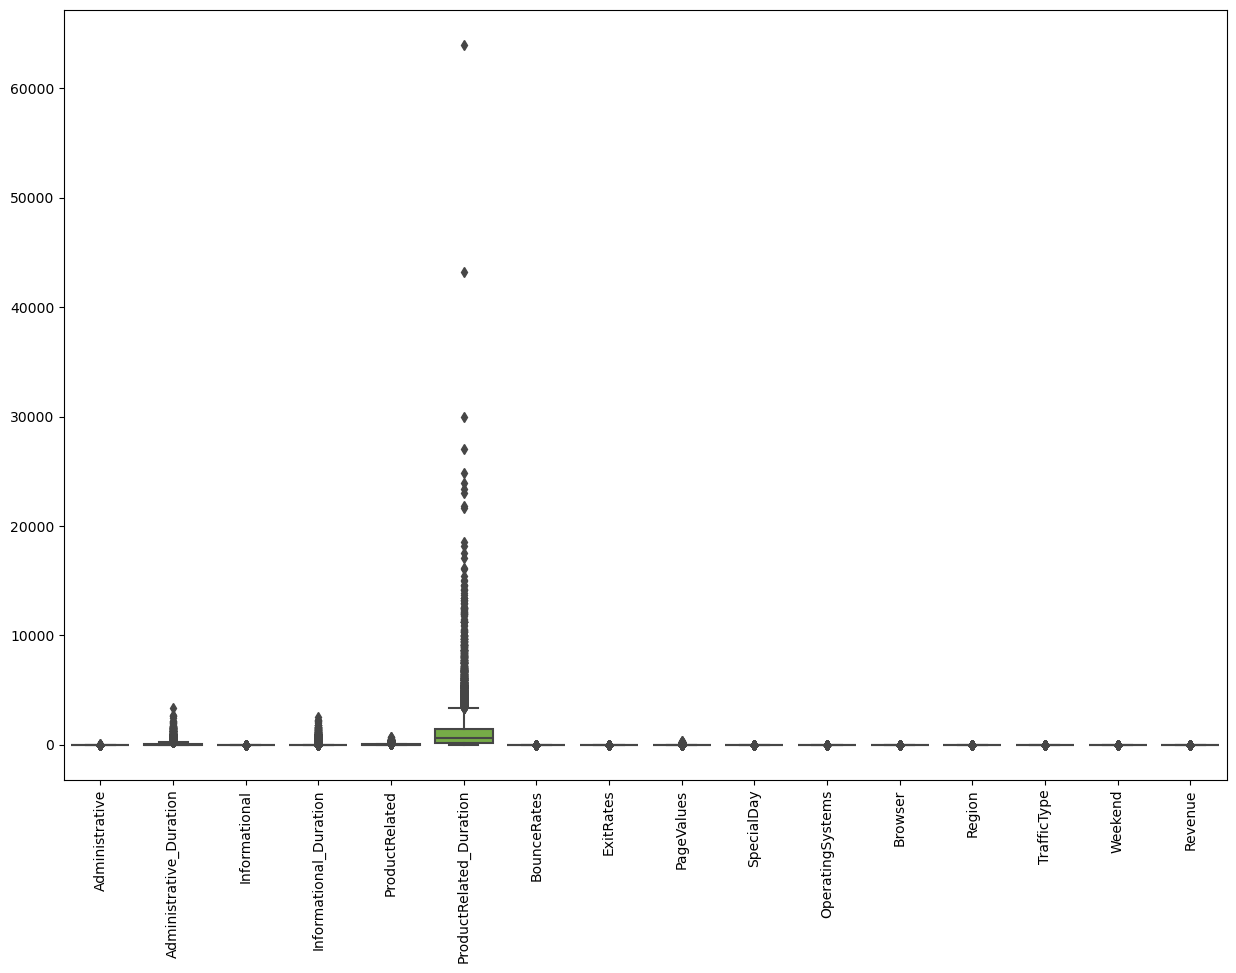

In [55]:
# Verificando a distribuição das variáveis numéricas
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Verificando outliers com boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [56]:
# Verificar valores faltantes
valores_faltantes = df.isnull().sum()

# Exibir apenas as colunas com valores faltantes
valores_faltantes = valores_faltantes[valores_faltantes > 0]
valores_faltantes


Series([], dtype: int64)

In [57]:
# Remover linhas com valores faltantes
df_sem_faltantes = df.dropna()

# Verificar se ainda há valores faltantes
valores_faltantes_restantes = df_sem_faltantes.isnull().sum()
valores_faltantes_restantes

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [58]:
# Verificando os tipos de dados
tipos_de_dados = df_sem_faltantes.dtypes
tipos_de_dados

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [59]:
# Verificando as colunas categóricas
colunas_categoricas = df_sem_faltantes.select_dtypes(include=['object']).columns
df_sem_faltantes[colunas_categoricas].head()

,Month,VisitorType
0,Feb,Returning_Visitor
1,Feb,Returning_Visitor
2,Feb,Returning_Visitor
3,Feb,Returning_Visitor
4,Feb,Returning_Visitor


In [61]:
# Verificando as colunas numéricas
colunas_numericas = df_sem_faltantes.select_dtypes(include=[np.number]).columns
df_sem_faltantes[colunas_numericas].head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4


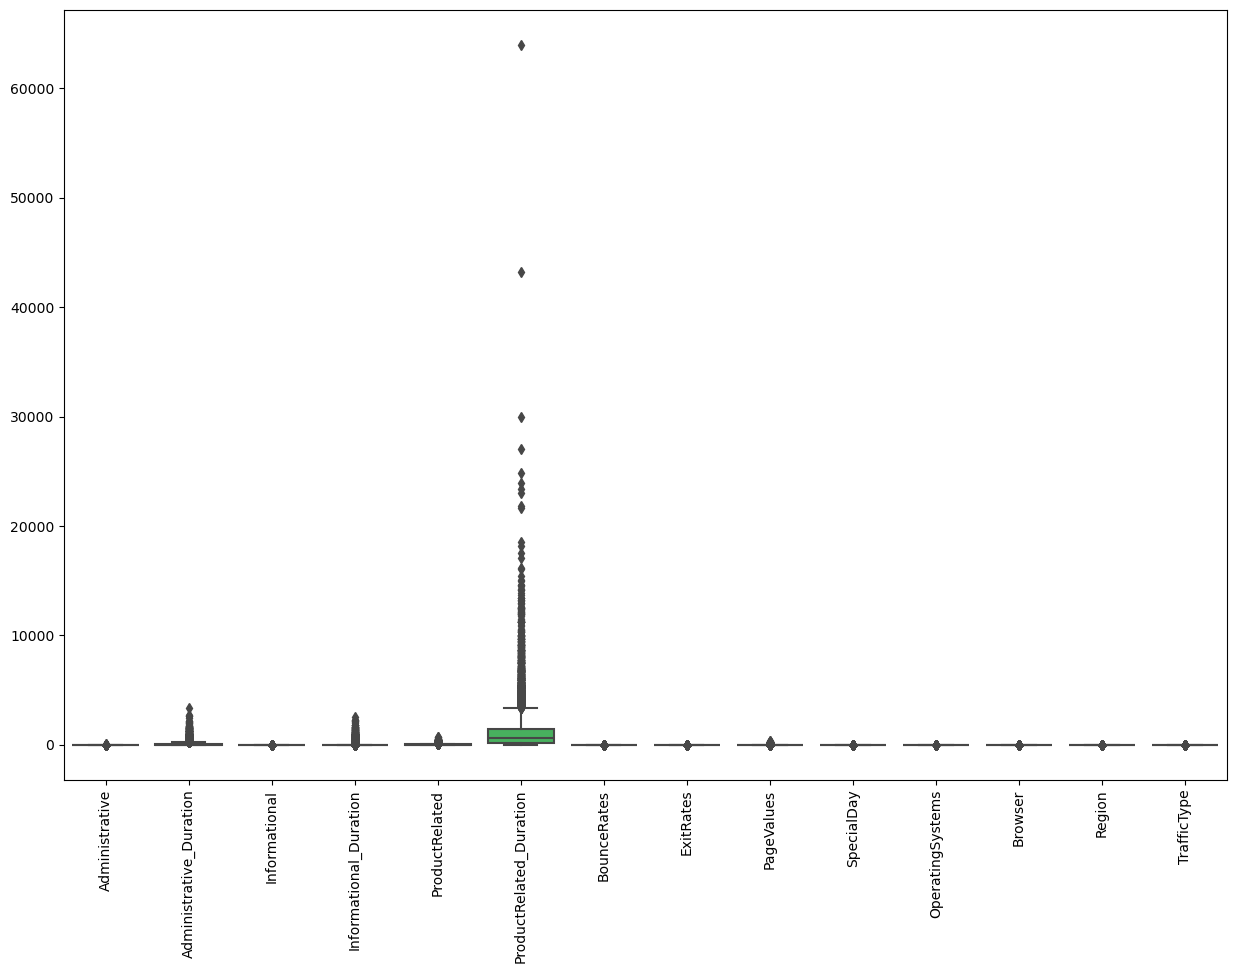

In [64]:
# Detectando outliers com boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_sem_faltantes[colunas_numericas])
plt.xticks(rotation=90)
plt.show()

# Padronização
scaler = StandardScaler()
df_padronizado = df_sem_faltantes.copy()
df_padronizado[colunas_numericas] = scaler.fit_transform(df_padronizado[colunas_numericas])

## Variáveis de agrupamento

Liste as variáveis que você vai querer utilizar. Essa é uma atividade importante do projeto, e tipicamente não a recebemos pronta. Não há resposta pronta ou correta, mas apenas critérios e a sua decisão. Os critérios são os seguintes:

- Selecione para o agrupamento variáveis que descrevam o padrão de navegação na sessão.
- Selecione variáveis que indiquem a característica da data.
- Não se esqueça de que você vai precisar realizar um tratamento especial para variáveis qualitativas.
- Trate adequadamente valores faltantes.

In [65]:
# Realizando One-Hot Encoding na variável categórica 'VisitorType'
df_codificado = pd.get_dummies(df_sem_faltantes, columns=['VisitorType'], drop_first=True)

# Exibindo as primeiras linhas do dataframe codificado
df_codificado.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,False,False,False,True
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,False,False,False,True
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,False,False,False,True
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,False,False,False,True
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,True,False,False,True


In [66]:
# Realizando One-Hot Encoding na variável 'Month'
df_codificado_data = pd.get_dummies(df_codificado, columns=['Month'], drop_first=True)

# Mantendo as variáveis 'Weekend' e 'SpecialDay' como estão
df_codificado_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,VisitorType_Returning_Visitor,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,True,False,True,False,False,False,False,False,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,True,False,True,False,False,False,False,False,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,True,False,True,False,False,False,False,False,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,True,False,True,False,False,False,False,False,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,True,False,True,False,False,False,False,False,False,False


In [67]:
# Verificar novamente se há valores faltantes após a codificação
valores_faltantes_novos = df_codificado_data.isnull().sum()

# Exibir apenas as colunas com valores faltantes
valores_faltantes_novos = valores_faltantes_novos[valores_faltantes_novos > 0]
valores_faltantes_novos

Series([], dtype: int64)

## Número de grupos

Nesta atividade vamos adotar uma abordagem bem pragmática e avaliar agrupamentos hierárquicos com 3 e 4 grupos, por estarem bem alinhados com uma expectativa e estratégia do diretor da empresa. 

*Atenção*: Cuidado se quiser fazer o dendrograma, pois com muitas observações ele pode ser mais complicado de fazer, e dependendo de como for o comando, ele pode travar o *kernell* do seu python.

In [72]:
# Normalizando os dados
scaler = StandardScaler()
df_normalizado = scaler.fit_transform(df_codificado_data)
df_normalizado

array([[-0.69699296, -0.4571914 , -0.3964779 , ..., -0.56679818,
        -0.21587139, -0.19417541],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.56679818,
        -0.21587139, -0.19417541],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.56679818,
        -0.21587139, -0.19417541],
       ...,
       [-0.69699296, -0.4571914 , -0.3964779 , ...,  1.76429641,
        -0.21587139, -0.19417541],
       [ 0.50722805, -0.03291592, -0.3964779 , ...,  1.76429641,
        -0.21587139, -0.19417541],
       [-0.69699296, -0.4571914 , -0.3964779 , ...,  1.76429641,
        -0.21587139, -0.19417541]])

In [75]:
Z = linkage(df_normalizado, method='ward')

In [77]:
grupos_3 = fcluster(Z, 3, criterion='maxclust')
grupos_4 = fcluster(Z, 4, criterion='maxclust')

In [82]:
df_codificado_data['Grupo_3'] = grupos_3
df_codificado_data['Grupo_4'] = grupos_4
df_codificado_data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Grupo_3,Grupo_4
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,True,False,False,False,False,False,False,False,1,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,True,False,False,False,False,False,False,False,1,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,True,False,False,False,False,False,False,False,1,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,True,False,False,False,False,False,False,False,1,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,True,False,False,False,False,False,False,False,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,False,False,False,False,False,False,False,False,3,4
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,False,False,False,False,False,True,False,False,3,4
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,False,False,False,False,False,True,False,False,3,4
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,False,False,False,False,False,True,False,False,3,4


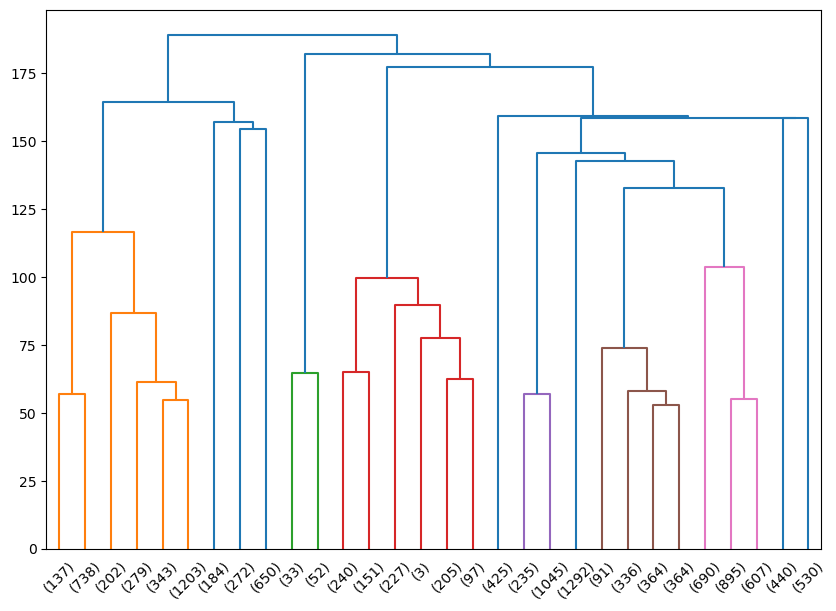

In [81]:
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='lastp', p=30) 
plt.show()

## Avaliação dos grupos

Construa os agrupamentos com a técnica adequada que vimos em aula. Não se esqueça de tratar variáveis qualitativas, padronizar escalas das quantitativas, tratar valores faltantes e utilizar a distância correta.

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [84]:
# Análise descritiva para o agrupamento com 3 grupos
analise_grupo_3 = df_codificado_data.groupby('Grupo_3').mean()
analise_grupo_3_transposta = analise_grupo_3.T 

In [85]:
# Análise descritiva para o agrupamento com 4 grupos
analise_grupo_4 = df_codificado_data.groupby('Grupo_4').mean()
analise_grupo_4_transposta = analise_grupo_4.T  # Transpor para facilitar a leitura

In [86]:
# Realizando One-Hot Encoding nas variáveis categóricas
df_codificado = pd.get_dummies(df, columns=['VisitorType', 'Month'], drop_first=True)

In [87]:
# Normalizando os dados
scaler = StandardScaler()
df_normalizado = scaler.fit_transform(df_codificado)

In [94]:
df_codificado['Grupo_3'] = fcluster(Z, 3, criterion='maxclust')
df_codificado['Grupo_4'] = fcluster(Z, 4, criterion='maxclust')


In [91]:
analise_grupo_3 = df_codificado.groupby('Grupo_3').mean().T
analise_grupo_3

Grupo_3,1,2,3
Administrative,1.375000,1.470588,2.781352
Administrative_Duration,39.299121,62.695588,101.208385
Informational,0.253244,0.176471,0.628748
Informational_Duration,9.726545,11.685490,46.748501
ProductRelated,21.708832,12.470588,36.807090
ProductRelated_Duration,761.415963,570.404862,1412.040949
BounceRates,0.048311,0.038551,0.009313
ExitRates,0.070447,0.063349,0.029544
PageValues,2.182859,18.191812,7.565782
SpecialDay,0.176547,0.000000,0.006046


In [92]:
analise_grupo_4 = df_codificado.groupby('Grupo_4').mean().T
analise_grupo_4

Grupo_4,1,2,3,4
Administrative,1.375000,1.470588,6.828819,2.270577
Administrative_Duration,39.299121,62.695588,345.832576,70.337708
Informational,0.253244,0.176471,2.668472,0.371343
Informational_Duration,9.726545,11.685490,279.998185,17.313246
ProductRelated,21.708832,12.470588,107.850488,27.841674
ProductRelated_Duration,761.415963,570.404862,4436.286125,1030.392289
BounceRates,0.048311,0.038551,0.006748,0.009637
ExitRates,0.070447,0.063349,0.020170,0.030726
PageValues,2.182859,18.191812,8.303577,7.472675
SpecialDay,0.176547,0.000000,0.014301,0.005004


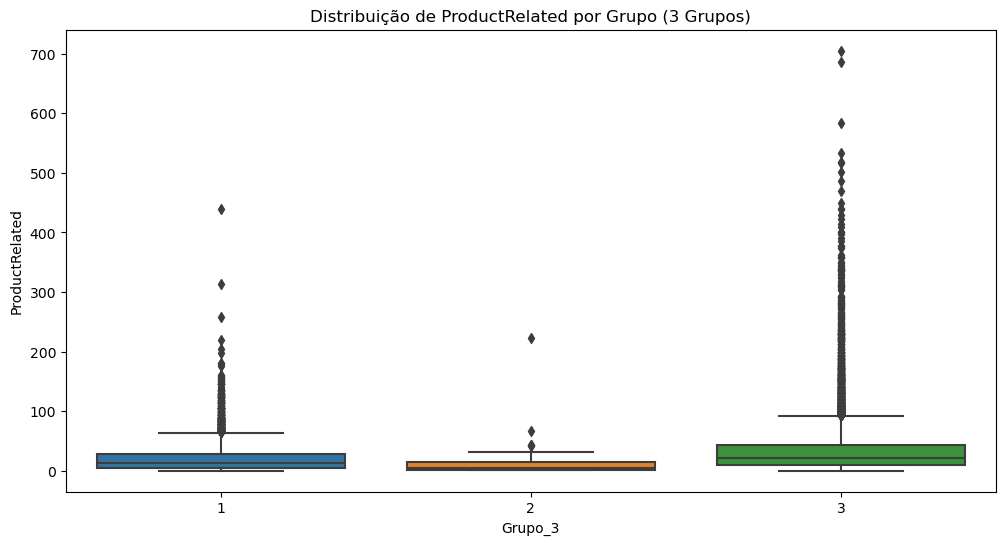

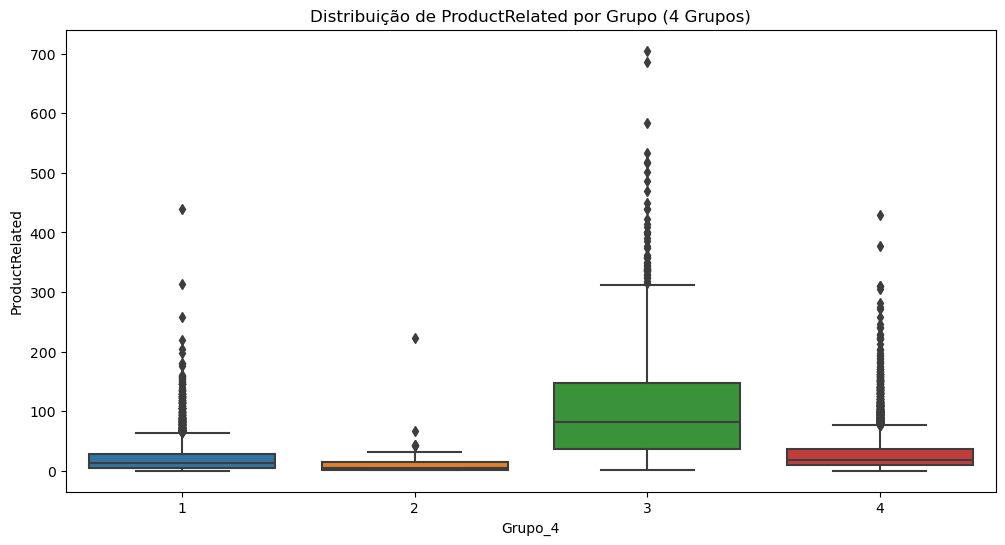

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot para uma variável específica
plt.figure(figsize=(12, 6))
sns.boxplot(x='Grupo_3', y='ProductRelated', data=df_codificado)
plt.title('Distribuição de ProductRelated por Grupo (3 Grupos)')
plt.show()

# Repetir para 4 grupos
plt.figure(figsize=(12, 6))
sns.boxplot(x='Grupo_4', y='ProductRelated', data=df_codificado)
plt.title('Distribuição de ProductRelated por Grupo (4 Grupos)')
plt.show()


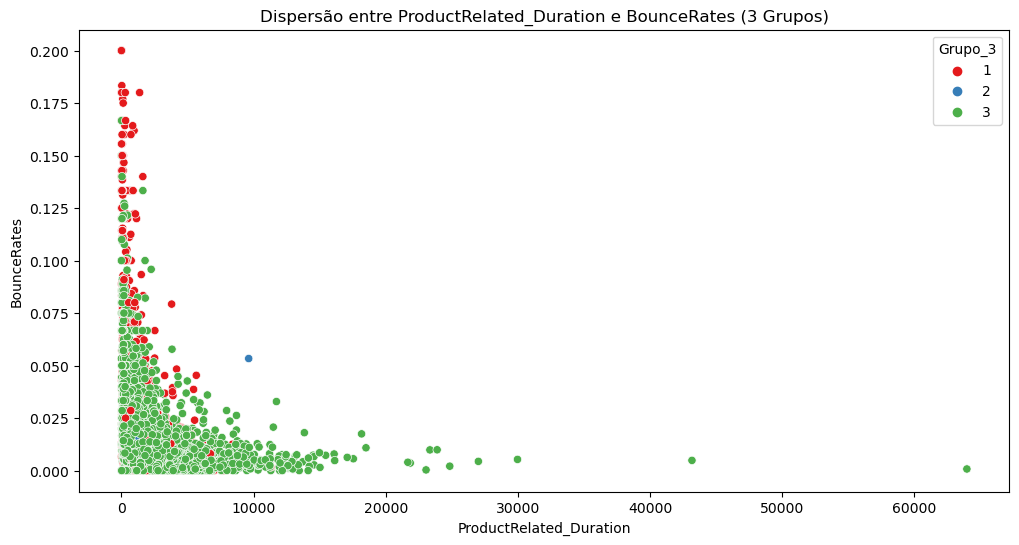

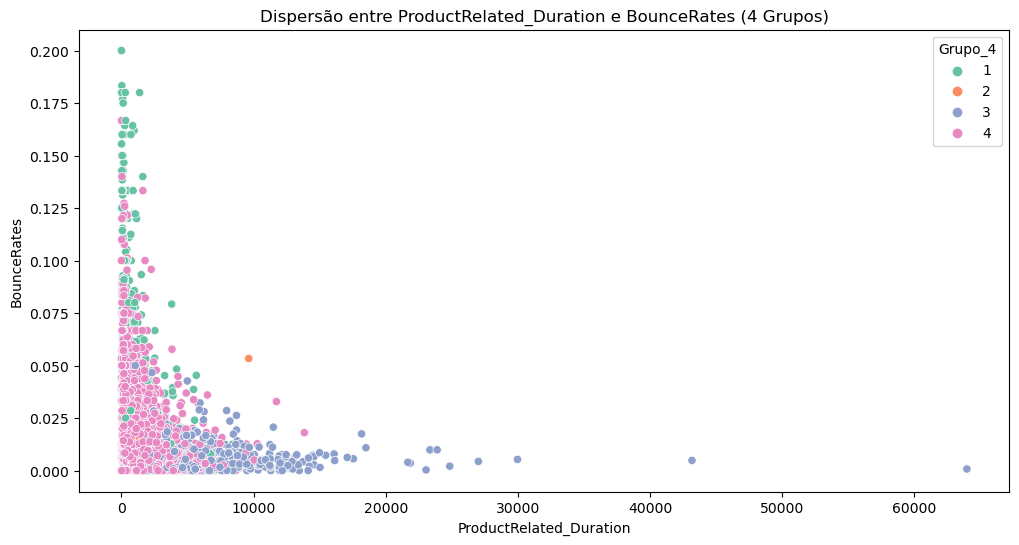

In [96]:
# Gráfico de dispersão para duas variáveis, colorindo pelos grupos
plt.figure(figsize=(12, 6))
sns.scatterplot(x='ProductRelated_Duration', y='BounceRates', hue='Grupo_3', data=df_codificado, palette='Set1')
plt.title('Dispersão entre ProductRelated_Duration e BounceRates (3 Grupos)')
plt.show()

# Repetir para 4 grupos
plt.figure(figsize=(12, 6))
sns.scatterplot(x='ProductRelated_Duration', y='BounceRates', hue='Grupo_4', data=df_codificado, palette='Set2')
plt.title('Dispersão entre ProductRelated_Duration e BounceRates (4 Grupos)')
plt.show()


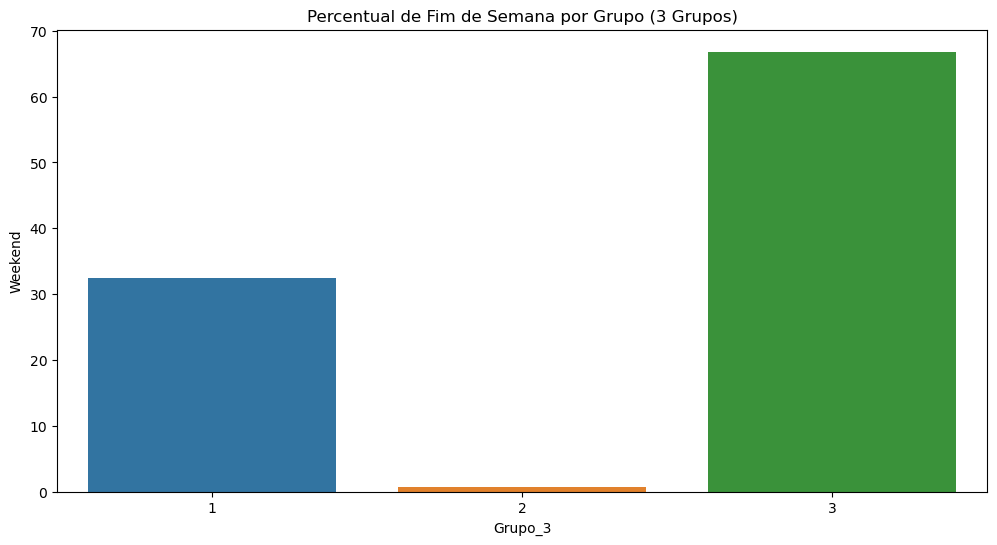

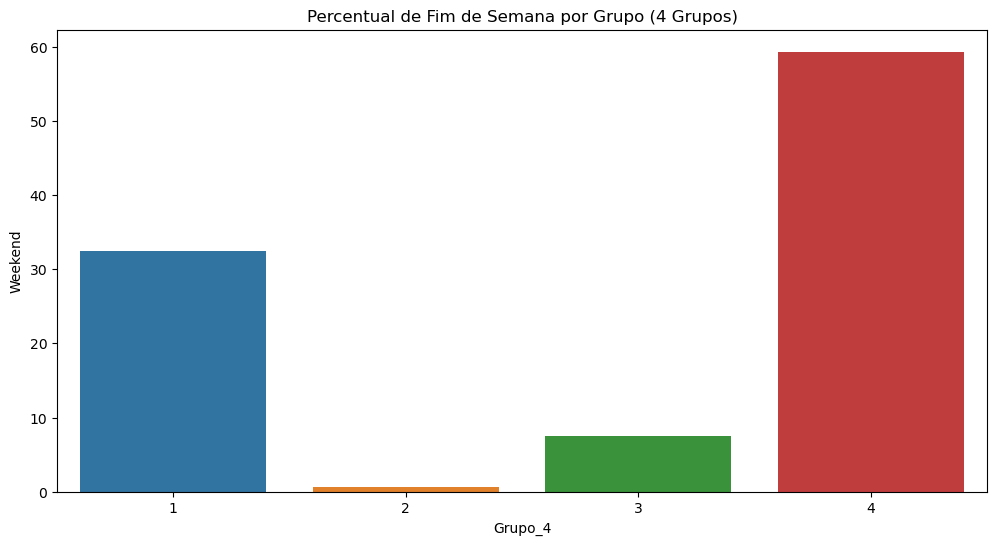

In [97]:
# Gráfico de barras para a média de uma variável categórica
plt.figure(figsize=(12, 6))
sns.barplot(x='Grupo_3', y='Weekend', data=df_codificado, estimator=lambda x: len(x) / len(df_codificado) * 100)
plt.title('Percentual de Fim de Semana por Grupo (3 Grupos)')
plt.show()

# Repetir para 4 grupos
plt.figure(figsize=(12, 6))
sns.barplot(x='Grupo_4', y='Weekend', data=df_codificado, estimator=lambda x: len(x) / len(df_codificado) * 100)
plt.title('Percentual de Fim de Semana por Grupo (4 Grupos)')
plt.show()

In [100]:
# Função para nomear os grupos
def nomear_grupo(codigo_grupo):
    if codigo_grupo == 1:
        return "Visitantes Exploratórios"
    elif codigo_grupo == 2:
        return "Compradores em Potencial"
    elif codigo_grupo == 3:
        return "Visitantes Recorrentes"
    elif codigo_grupo == 4:
        return "Visitantes Ocasionais"


In [102]:
# Aplicando a função para criar a coluna 'Nome_Grupo'
df_codificado['Nome_Grupo'] = df_codificado['Grupo_4'].apply(nomear_grupo)

In [103]:
# Exibir as primeiras linhas para verificar
df_codificado[['Grupo_4', 'Nome_Grupo']].head()

,Grupo_4,Nome_Grupo
0,1,Visitantes Exploratórios
1,1,Visitantes Exploratórios
2,1,Visitantes Exploratórios
3,1,Visitantes Exploratórios
4,1,Visitantes Exploratórios


## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [104]:
# Análise descritiva para Bounce Rate e Revenue
analise_variaveis_fora_escopo = df_codificado.groupby('Nome_Grupo')[['BounceRates', 'Revenue']].mean()

# Exibir a análise
analise_variaveis_fora_escopo

,BounceRates,Revenue
Nome_Grupo,,
Compradores em Potencial,0.038551,0.188235
Visitantes Exploratórios,0.048311,0.021956
Visitantes Ocasionais,0.009637,0.194695
Visitantes Recorrentes,0.006748,0.411701


O Grupo que possui mais clientes propensos a compra é o ''Visitantes Recorrentes''